# Working with images

Author: Diana Mateus


## 1. Reading and displaying images
Follow the instructions bellow to import the required modules and to read and display the images in the provided image folder. We will use the ```skimage.io``` module. 

### 1.1 Import the required modules




In [1]:
!pip show numpy

Name: numpy
Version: 1.16.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: e:\ananconda\lib\site-packages
Requires: 
Required-by: tensorflow, tensorboard, tb-nightly, tables, seaborn, scikit-learn, PyWavelets, pytest-doctestplus, pytest-arraydiff, patsy, pandas, paddlepaddle, opt-einsum, opencv-python, odo, numexpr, numba, mkl-random, mkl-fft, matplotlib, labelme, Keras-Preprocessing, Keras-Applications, h5py, datashape, Bottleneck, bokeh, bkcharts, astropy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
import numpy.random


### 1.2 Load visualize one image from the patterns directory 

```skimage.io``` module allows reading and saving images in a number of formats. It can also read collections of images.


use ```plt.tilte``` and ```plt.axis("off")``` to add the filename as title of the figure and remove the axis ticks



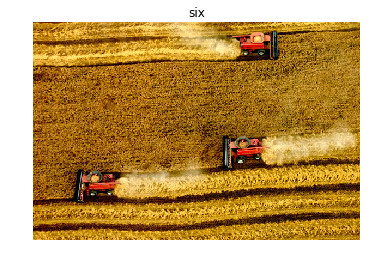

In [3]:
filename = "./patterns/15.jpg"
im = io.imread(filename)
plt.imshow(im)
plt.title('six')
plt.axis('off')
# FILL IN
plt.show()

### 1.3 Dimensions, type and range of the array

The image you just read is stored as a numpy array, find out:
- The image size or shape of the array ```im.shape``` 
- The numerical type in which the values are saved ```im.dtype```
- The minimum, maximum, mean and standard deviation of its values ```im.min(), im.max(), im.mean(), im.std()```

What can you say about the luminance and the contrast of this image?

In [4]:
print(im.shape,im.dtype,im.min(),im.max(),im.mean(),im.std())

(400, 600, 3) uint8 0 255 100.24271388888889 74.20650533755504


### 1.4 Problems with integer images

As you can see most of the images are saved in a uint8 type. This can be problematic when we operate transformations on the images. **When doing operations with images it is always better to convert the image first to float** , you may also need to normalize them to display them in the correct range. 


#### a) Integer overflow
- Reread the original image
- Add 100 to all the values in the image using broadcasting ( im = im + 100)
- Display in a new figure the image and compare to the original. 
- What is the effect of adding a fix number to all pixels? 
- what is the maximum value of the image before and after? 

**Explain what is happening (overflow)?**. 

#### b) Operating and displaying float images
- Reread the original image
- Convert the image to float using ``astype``  
- Add 100 to the float image
- Display in a new figure the float image image.

**Nothing shows up? Imshow expects float images to have values between 0 and 1.**

- Use the image normalization formula to normalize the intensities to fit that range
- Display again




a) Integer overflow

255 0 130.49480277777778


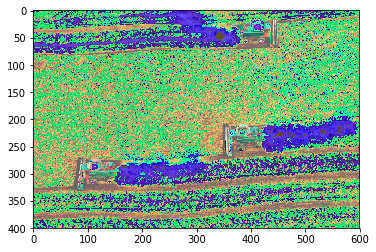

In [5]:
im_a = im + 100
plt.imshow(im_a)
print(im_a.max(), im_a.min(),im_a.mean())

b) Operating and displaying float images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100.24272 200.24266


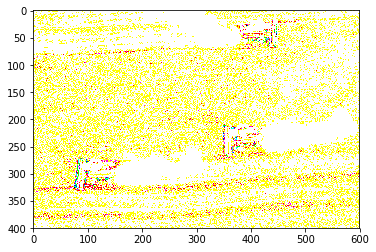

In [6]:
im_f = io.imread(filename).astype('float32')
im_f_a = im_f + 100
print(im_f.mean(), im_f_a.mean())
def normalize(a):
    a = a/a.max()
    return a
#im_f = normalize(im_f)
plt.imshow(im_f)


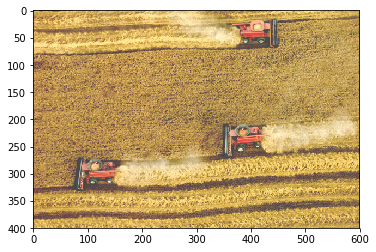

In [7]:
im_f_a = normalize(im_f_a)
plt.imshow(im_f_a)

### 1.5 Reading the image as Grayscale
Read and visualize now the image giving the extra argument ```as_gray=True``` to the imread function, 
- what are the min and max values of the image after reading in gray mode?
- Fix the visualization changing the colormap by adding as argument to imshow ```cmap='gray'```





0.9966070588235294 0.0


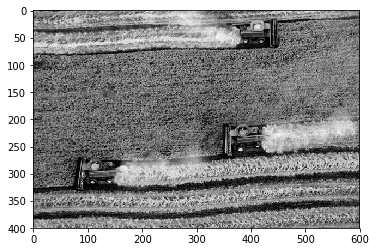

In [8]:
im_g = io.imread(filename, as_gray = True)
print(im_g.max(), im_g.min())
plt.imshow(im_g,cmap='gray')

### 1.6 File format and memory print
- Save the image as tiff and jpeg formats with ```io.imsave```. 
- Compare in the file explorer the memory sizes of the files. 
- How do you explain this difference?
- Are the images stored correctly? Fix them if not

In [9]:
io.imsave('im_f.tiff', im_f.astype('uint8'))
io.imsave('im_g.jpeg', im_g)

E:\ananconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


.tiff is not UTF-8 encoded. 
to solve this problem u have to use astype() and maybe to multiple the maximun to the original image
the difference might be caused by the different ways of compression

## 2. Manipulating images 


### 2.1 Understanding the  dimensions of the image
Read one of the images in color mode. Using python and numpy slicing commands (e.g. ``:`` for intervals, ``-1`` to reverse order, etc) to:
- Visualize only a row, a column and a cropped window of size (50x50) of an image (Hint: use transpose ```.T``` for displaying the rows as lines
- Flip the image vertically, horizontally, diagonally by reversing the order of the pixels in the image.



(400, 600, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x25b6dd9bac8>,
 <matplotlib.image.AxesImage at 0x25b6e5e50f0>)

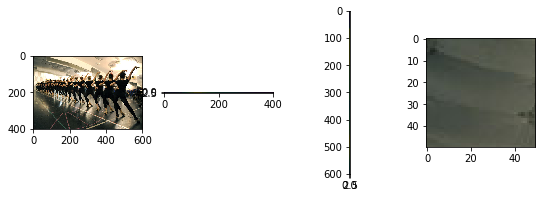

In [10]:
%matplotlib inline
width=9
height=3
plt.rcParams['figure.figsize'] = [width, height]

filename = "./patterns/20.jpg"
im = io.imread(filename)
print(np.shape(im))
im_a = im[:,1,:].T
im_b = im[1,:,:]
im_c = im[0:50,0:50,:]

plt.subplot(1,4,1), plt.imshow(im)
plt.subplot(1,4,2), plt.imshow(im_a)
plt.subplot(1,4,3), plt.imshow(im_b)
plt.subplot(1,4,4), plt.imshow(im_c)

### 2.3. Playing with color channels

Load one of the images and:
- Display separately each color channel as an independent grayscale image
- Exchange red and green channels and show the results
- Convert the image to grayscale with a simple average of the colors (try also the weights from the lecture)


(<matplotlib.axes._subplots.AxesSubplot at 0x25b6e67cf60>,
 <matplotlib.image.AxesImage at 0x25b6ee24588>)

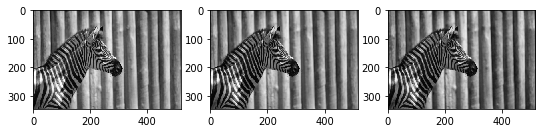

In [11]:
#separate color channels
filename = "E:\Juptyer_Workshop\spi2\project\images\Fourier\zebra-wall.png"
im = io.imread(filename)
R = im [:,:,0]/255
G = im [:,:,1]/255
B = im [:,:,2]/255

plt.imshow(im)

#display as independent grayscale images
plt.subplot(1,3,1), plt.imshow(R, cmap='gray')
plt.subplot(1,3,2), plt.imshow(G, cmap='gray')
plt.subplot(1,3,3), plt.imshow(B, cmap='gray')


(<matplotlib.axes._subplots.AxesSubplot at 0x25b6db53400>,
 <matplotlib.image.AxesImage at 0x25b6f015c50>)

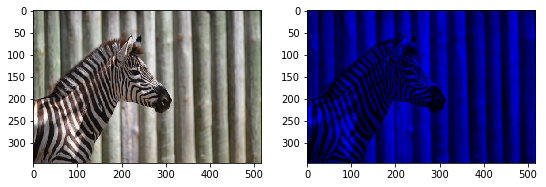

In [12]:
#exchange color channels

im_ex = im.copy()
im_ex[:,:,0] = G
im_ex[:,:,1] = R
plt.subplot(1,2,1), plt.imshow(im)
plt.subplot(1,2,2), plt.imshow(im_ex)

E:\ananconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


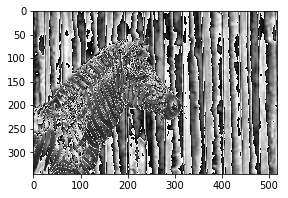

In [13]:
#convert to grayscale
a,b,c = np.shape(im)
im_grey = np.zeros((a, b))
for i in range(a):
    for j in range(b):
        im_grey[i,j] = np.mean(im[i,j,0] + im[i,j,1] + im[i,j,2])
plt.imshow(im_grey,cmap='gray')
    

## 3 First steps for the JPEG project





### 3.1 Convert to YIQ

Take one of the images (in RGB) and conver it to the YIQ space

https://en.wikipedia.org/wiki/YIQ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


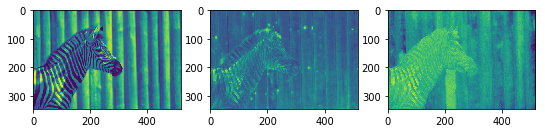

In [14]:
Y = 0.299*R + 0.587*G + 0.114*B
I = 0.5959*R - 0.2746*G - 0.3213*B
Q = 0.2115*R - 0.5227*G + 0.3112*B
im_yiq = np.zeros((a,b,c))
im_yiq[:,:,0] = Y
im_yiq[:,:,1] = I
im_yiq[:,:,2] = Q
plt.imshow(im_yiq)

plt.subplot(1,3,1)
plt.imshow(Y)
plt.subplot(1,3,2)
plt.imshow(I)
plt.subplot(1,3,3)
plt.imshow(Q)




### 3.2 Split the images into patches

JPEG requires subdividing the images into 8x8 patches, each of which is then processed individually. 

Take one image and divide it into 8x patches , build a list storing them, and show some of them